<a href="https://colab.research.google.com/github/KUNALDEBNATH/image-to-speech-using-GPU/blob/main/VisionNarator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
!pip install transformers

In [3]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer ,GPT2TokenizerFast
import torch
from PIL import Image

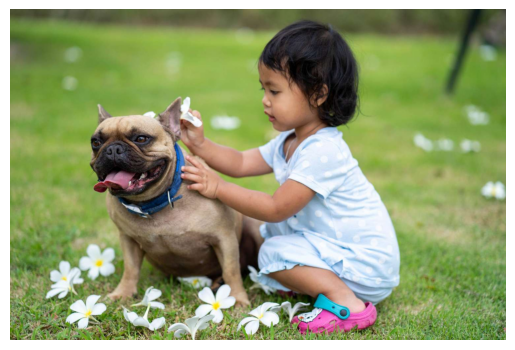

Generated Caption (GPT-2 Tokenizer): a little girl sitting on the grass with a dog 
--------------------------------------------------


In [8]:
import torch
from PIL import Image
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer, GPT2TokenizerFast
import matplotlib.pyplot as plt

# Load the model and tokenizer
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
vit_tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
gpt_tokenizer = GPT2TokenizerFast.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length =20 # Adjust max_length for longer captions
num_beams = 10
gen_kwargs = {"max_length": max_length, "num_beams": num_beams, "early_stopping": False}  # Enable early stopping for beam search

def predict_step(image_paths):
    captions = []
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")

        # Create figure and axes
        fig, ax = plt.subplots()

        # Display the image
        ax.imshow(i_image)
        ax.axis("off")
        plt.show()

        # Preprocess the image
        images = [i_image]
        pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values.to(device)

        # Generate captions
        with torch.no_grad():
            output_ids = model.generate(pixel_values, **gen_kwargs)

        # Decode the generated caption using GPT-2 tokenizer
        cap = gpt_tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0]
        captions.append(cap)

    return captions

# Example usage
captions = predict_step(['/content/GettyImages-1188585341-2000-3f694b82f2c14f098f56eb4c5052320a.jpg'])
for cap in captions:
    print("Generated Caption (GPT-2 Tokenizer):", cap)
    print("-" * 50)


In [9]:
!pip install TTS HD
!pip install numpy==1.24.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 938.0/938.0 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 43.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 88.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 16.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.0
    Uninstalling numpy-1.22.0:
      Successfully uninstalled numpy-1.22.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tts 0.22.0 requires numpy==1.22.0; python_version <= "3.10", but you have numpy 1.24.0 which is incompatible.
chex 0.1.86 requires numpy>=1.24.1, but you have numpy 1.24.0 which is incompatible.
pandas-stubs 2.0.3.230814 requires numpy>=1.25.0; python_version >= "3.9", but you have numpy 1.24.0 which is incompatible.
seaborn 0.13.1 requires numpy!=1.24.0,>=1.20, but you have numpy 1.24.0 which is incompatible.


In [10]:
pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 10.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15718 sha256=5348389adaa9e1587e23a705419d2478f2deea698822965828da836ade37c12b
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling ch

In [11]:
from TTS.api import TTS
import torch
from IPython.display import Audio, display

tts = TTS("tts_models/multilingual/multi-dataset/xtts_v2", gpu=True).to("cuda")

#generate audio
tts.tts_to_file(cap,
    speaker_wav='/content/Recording (2).m4a',
    file_path="output_synth.wav",
    language='en'
)
audio_widget = Audio(filename="output_synth.wav", autoplay=False)
display(audio_widget)

/usr/local/lib/python3.10/dist-packages/TTS/api.py:70: UserWarning: `gpu` will be deprecated. Please use `tts.to(device)` instead.
  warnings.warn("`gpu` will be deprecated. Please use `tts.to(device)` instead.")


 > You must confirm the following:
 | > "I have purchased a commercial license from Coqui: licensing@coqui.ai"
 | > "Otherwise, I agree to the terms of the non-commercial CPML: https://coqui.ai/cpml" - [y/n]
 | | > y
 > Downloading model to /root/.local/share/tts/tts_models--multilingual--multi-dataset--xtts_v2


100%|█████████▉| 1.86G/1.87G [00:32<00:00, 58.9MiB/s]
100%|██████████| 1.87G/1.87G [00:33<00:00, 55.9MiB/s]
100%|██████████| 4.37k/4.37k [00:00<00:00, 12.4kiB/s]

100%|██████████| 361k/361k [00:00<00:00, 873kiB/s]
100%|██████████| 32.0/32.0 [00:00<00:00, 55.7iB/s]
 74%|███████▎  | 5.70M/7.75M [00:00<00:00, 57.0MiB/s]

 > Model's license - CPML
 > Check https://coqui.ai/cpml.txt for more info.
 > Using model: xtts


100%|██████████| 7.75M/7.75M [00:15<00:00, 57.0MiB/s]

 > Text splitted to sentences.
['a little girl sitting on the grass with a dog']
 > Processing time: 3.640873670578003
 > Real-time factor: 0.8383590688830929
